In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
sns.set()

Read data from file

In [10]:
all_tracks_df = pd.read_pickle("../data/spotify_dataset_all.pkl")

In [11]:
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927,0.830,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995,0.943,0.0736,0.2440,130.253,184853,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995,0.887,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,classical,0.1590,0.04010,7,-27.516,1,0.0446,0.984,0.760,0.1560,0.1060,106.239,462627,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994,0.901,0.0823,0.0634,69.043,378733,4


Normalise values

In [12]:
normalised_vals_df = all_tracks_df.loc[:, all_tracks_df.columns != 'genre']
normalised_vals_df = (normalised_vals_df - normalised_vals_df.min())/(normalised_vals_df.max() - normalised_vals_df.min())
all_tracks_df = pd.merge(all_tracks_df[['genre']], normalised_vals_df, left_index=True, right_index=True)
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.035683,0.032810,0.181818,0.441113,0.0,0.101165,0.930723,0.845214,0.084732,0.029023,0.148602,0.084694,0.50
5bu9A6uphPWg39RC3ZKeku,classical,0.426247,0.013053,0.363636,0.308423,0.0,0.076801,0.998996,0.960285,0.062150,0.229169,0.521763,0.062907,0.75
3DNRdudZ2SstnDCVKFdXxG,classical,0.133406,0.004398,0.090909,0.144985,0.0,0.055085,0.998996,0.903259,0.165113,0.132425,0.761220,0.189824,0.50
67TCAXIe154ZGDNaWceqxC,classical,0.106291,0.039328,0.636364,0.363290,1.0,0.058792,0.987952,0.773931,0.147504,0.085613,0.379284,0.332902,0.75
1Oo7XEqkrwifJn17aA0ocF,classical,0.258134,0.005391,0.818182,0.286991,1.0,0.067267,0.997992,0.917515,0.071162,0.041298,0.158594,0.251357,0.75


Change all genres except rap to other

In [13]:
all_tracks_df.loc[all_tracks_df['genre'] != 'rap', 'genre'] = 'other'

Look at genre distribution

<AxesSubplot:ylabel='genre'>

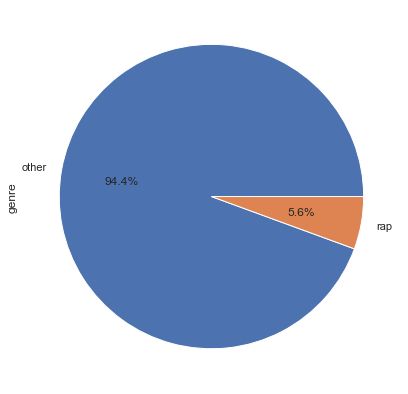

In [14]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

In [15]:
all_tracks_df['genre'].value_counts()

other    6238
rap       369
Name: genre, dtype: int64

Resample data

In [16]:
pop_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'rap'].sample(n=360, random_state=1)
other_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'other'].sample(n=360, random_state=1)
resampled_tracks_df = pd.concat([pop_sample_df, other_sample_df])
resampled_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
5IZc3KIVFhjzJ0L2kiXzUl,rap,0.798265,0.469469,0.727273,0.797841,1.0,0.111758,0.060137,0.000000,0.063911,0.475710,0.360404,0.101191,0.75
6PBAPjshd2JfEiWpdf3C2a,rap,0.795011,0.778361,0.090909,0.896737,0.0,0.155985,0.098591,0.000000,0.195152,0.709768,0.698387,0.051425,0.75
5uQOauh47VFt3B2kV9kRXw,rap,0.814534,0.621909,0.454545,0.793631,1.0,0.077066,0.244977,0.000000,0.088461,0.856444,0.211725,0.007799,0.75
6gSw5vz7dcafda23VqMrnl,rap,0.573753,0.498553,0.818182,0.826215,1.0,0.159693,0.162648,0.000000,0.084007,0.499636,0.223734,0.072126,0.75
5l53XkYN5rTYmdJ0P2GKFT,rap,0.598698,0.836528,0.272727,0.888787,0.0,0.409428,0.106423,0.000000,0.130930,0.686882,0.602590,0.134271,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4N6JkrGD78eLooaTDmwo9s,other,0.387202,0.226769,0.363636,0.631559,0.0,0.041049,0.915662,0.837067,0.084939,0.193800,0.363543,0.267713,0.75
2T6LorlhK71uT66I6lJegX,other,0.436009,0.761311,0.181818,0.846080,1.0,0.231992,0.038049,0.000000,0.105034,0.651514,0.484064,0.042976,0.75
68Lt6BitkkDXzvlPMrXKjV,other,0.421909,0.626924,0.000000,0.767877,1.0,0.025424,0.007677,0.000002,0.356743,0.856444,0.501382,0.083877,0.75
0LoQuiekvzqx7n8flgEKzF,other,0.723427,0.879653,1.000000,0.824401,0.0,0.090042,0.176704,0.871690,0.617775,0.923021,0.500030,0.138490,0.75


<AxesSubplot:ylabel='genre'>

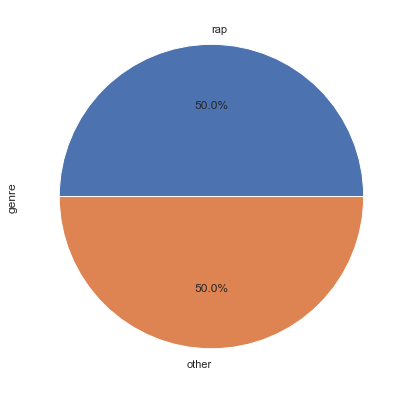

In [17]:
resampled_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

See summary statistics

In [18]:
resampled_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.658082,0.605885,0.459722,0.805182,0.593056,0.289837,0.210679,0.069113,0.181105,0.456371,0.459315,0.112898,0.738889
std,0.196559,0.208379,0.338094,0.103938,0.491606,0.280522,0.277678,0.216087,0.151419,0.241744,0.166079,0.083311,0.086752
min,0.007267,0.004317,0.000000,0.120350,0.000000,0.004502,0.000069,0.000000,0.014087,0.009050,0.050515,0.001504,0.000000
25%,0.538232,0.497300,0.090909,0.788693,0.000000,0.062963,0.019550,0.000000,0.085172,0.252835,0.318932,0.067088,0.750000
50%,0.697939,0.627927,0.454545,0.831075,1.000000,0.160355,0.084836,0.000000,0.114875,0.467908,0.469290,0.101178,0.750000
75%,0.801790,0.741504,0.727273,0.862434,1.000000,0.492187,0.272337,0.000226,0.232184,0.643712,0.579834,0.136475,0.750000
max,0.994577,0.992980,1.000000,0.948223,1.000000,0.997352,0.998996,0.975560,0.995857,0.977114,0.947070,0.936444,1.000000


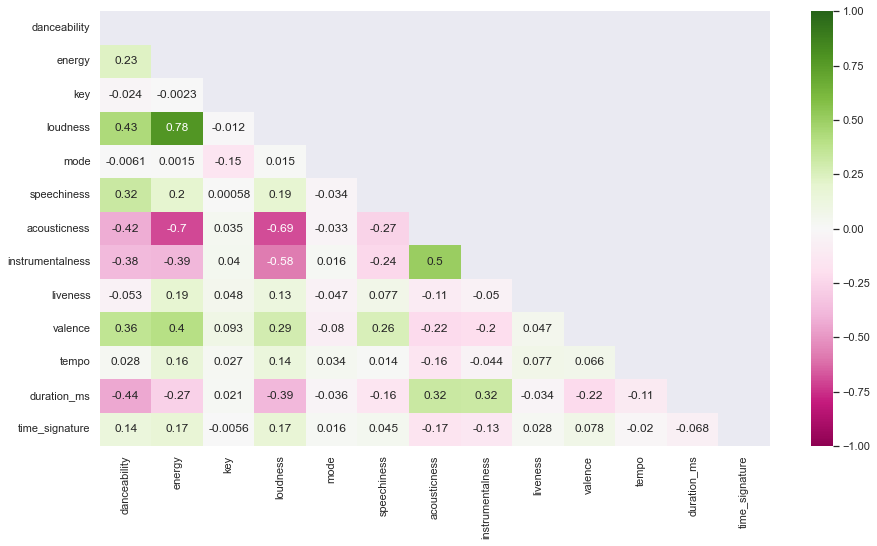

In [19]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(resampled_tracks_df.corr(), dtype=bool))
sns.heatmap(resampled_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG");

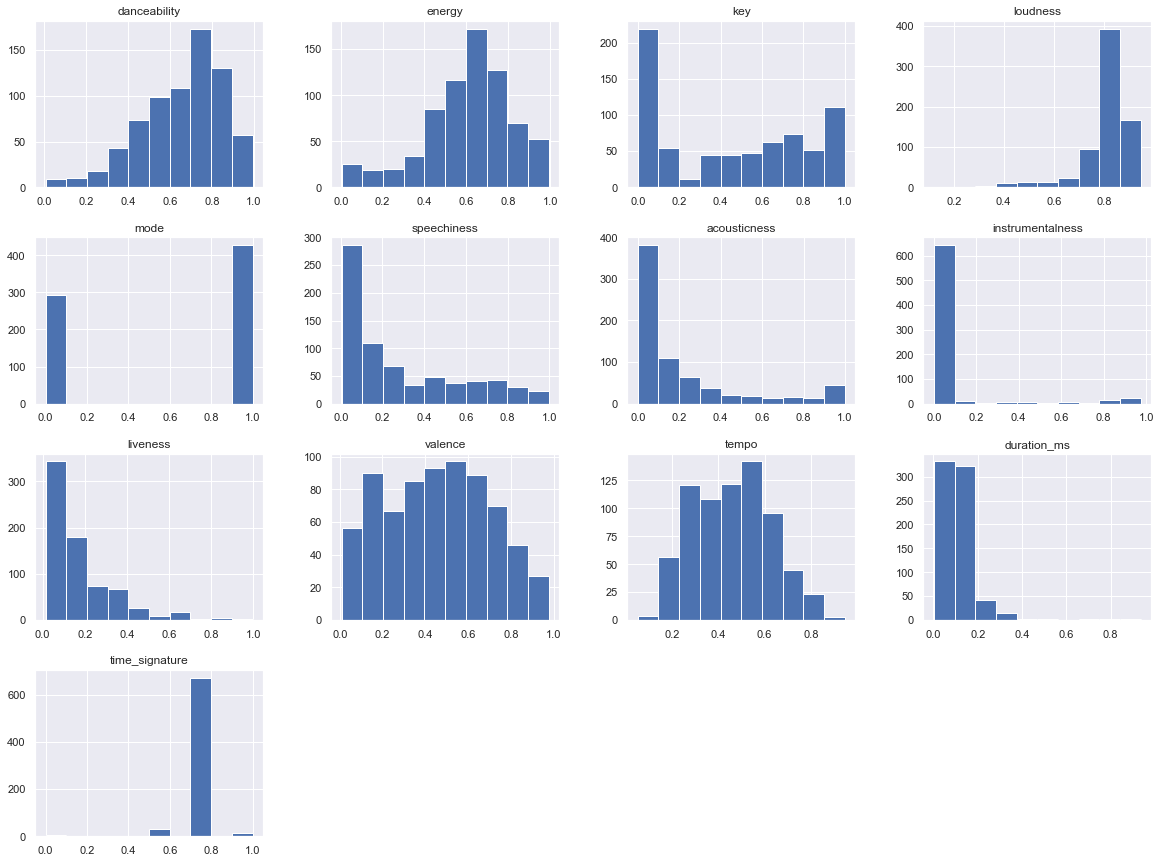

In [20]:
resampled_tracks_df.hist(figsize=(20,15));

Split data

In [21]:
# Feature variables
X = resampled_tracks_df.loc[:, resampled_tracks_df.columns != 'genre']
# Target variable
y = resampled_tracks_df['genre']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree

In [23]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train, y_train)

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


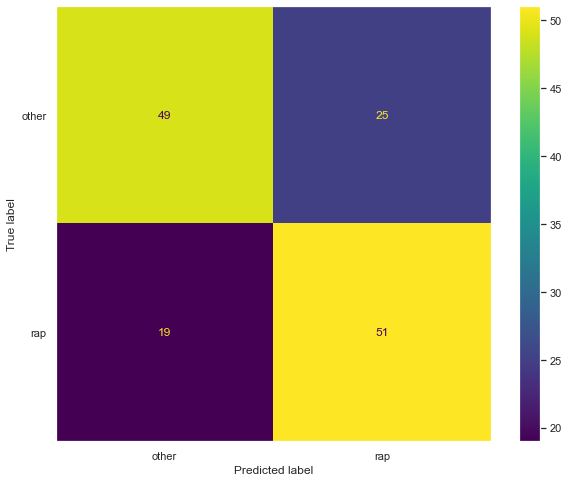

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=dt_clf.classes_, ax=ax);


Pruning decision tree

In [25]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

dt_clfs = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dt_clfs.append(dt_clf)

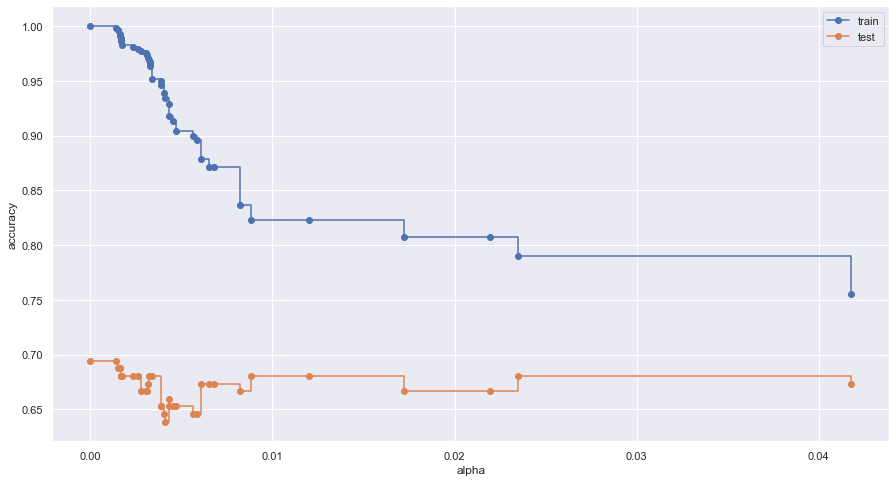

In [26]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()

In [27]:
best_ccp = ccp_alphas[np.argmax(test_scores)]
best_ccp

0.0

Cross Validation

<AxesSubplot:xlabel='tree'>

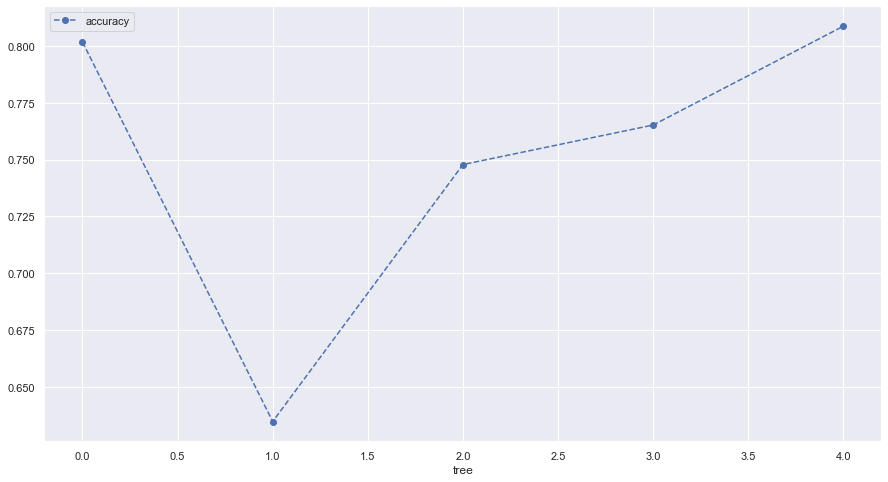

In [28]:
dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp)
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
fig, ax = plt.subplots(figsize=(15,8))
df.plot(x='tree', y='accuracy', marker='o', linestyle='--', ax=ax)

Above shows alpha is sensitive to different training/testing data.

<AxesSubplot:xlabel='alpha'>

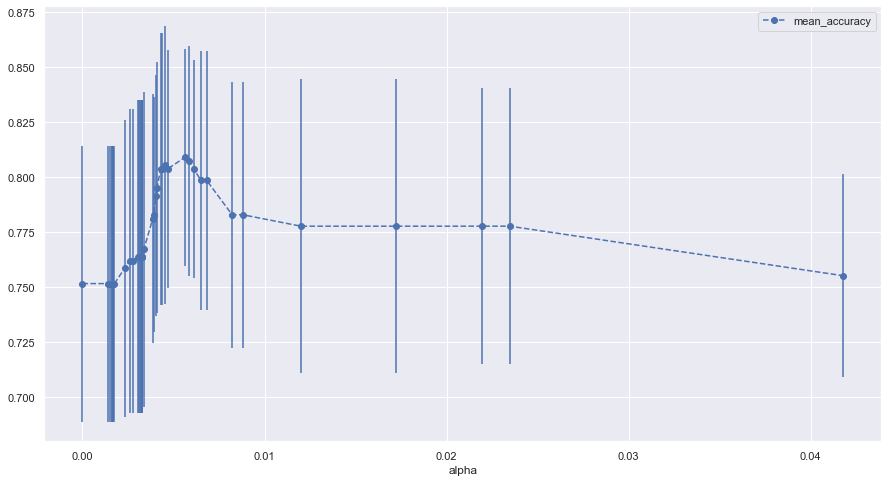

In [29]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
fig, ax = plt.subplots(figsize=(15,8))
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--', ax=ax)

In [30]:
ideal_ccp = alpha_results.iloc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_ccp

0.005622860504920835

Building final tree

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


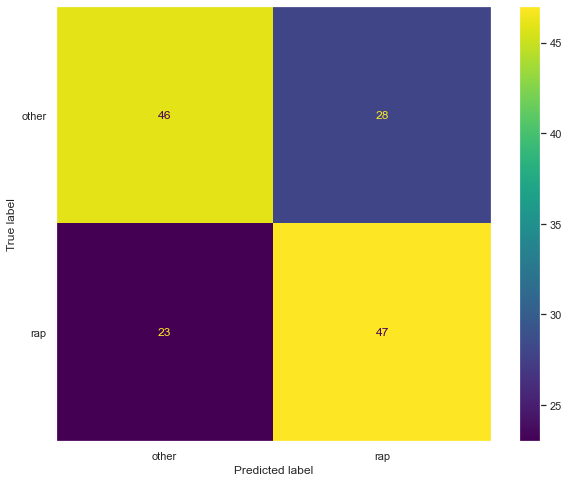

In [31]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=ideal_ccp)
dt_clf_pruned = dt_clf_pruned.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf_pruned, X_test, y_test, display_labels=dt_clf_pruned.classes_, ax=ax);

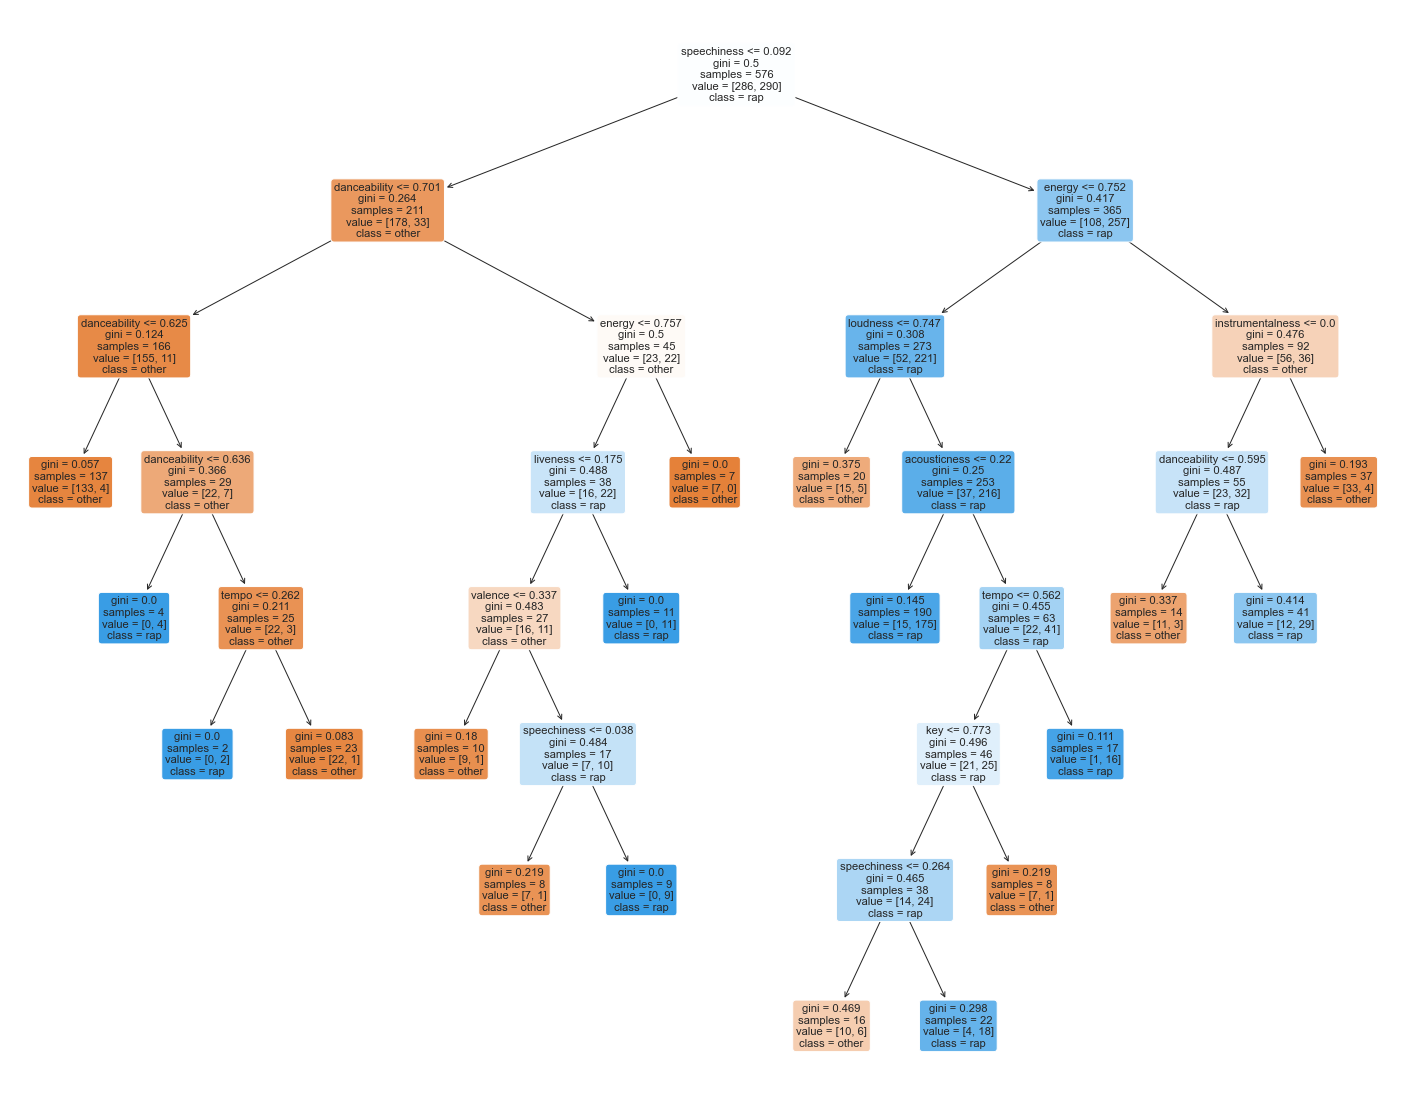

In [32]:
plt.figure(figsize=(25,20))
plot_tree(dt_clf_pruned, filled=True, rounded=True, class_names=dt_clf_pruned.classes_, feature_names=X.columns);

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [34]:
df = pd.read_pickle("../data/spotify_dataset_all.pkl")
df.loc[df['genre'] != 'rap', 'genre'] = 0
df.loc[df['genre'] == 'rap', 'genre'] = 1
df['genre'] = df['genre'].astype(int)
pdf = df.loc[df['genre'] == 1].sample(n=360, random_state=1)
odf = df.loc[df['genre'] == 0].sample(n=360, random_state=1)
df = pd.concat([pdf, odf])
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
5IZc3KIVFhjzJ0L2kiXzUl,1,0.797,0.469,8,-8.112,1,0.0646,0.05990,0.000000,0.0753,0.481,103.057,224240,4
6PBAPjshd2JfEiWpdf3C2a,1,0.794,0.777,1,-3.696,0,0.0813,0.09820,0.000000,0.2020,0.706,160.022,173040,4
5uQOauh47VFt3B2kV9kRXw,1,0.812,0.621,5,-8.300,1,0.0515,0.24400,0.000000,0.0990,0.847,77.998,128157,4
6gSw5vz7dcafda23VqMrnl,1,0.590,0.498,9,-6.845,1,0.0827,0.16200,0.000000,0.0947,0.504,80.022,194337,4
5l53XkYN5rTYmdJ0P2GKFT,1,0.613,0.835,3,-4.051,0,0.1770,0.10600,0.000000,0.1400,0.684,143.876,258273,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4N6JkrGD78eLooaTDmwo9s,0,0.418,0.227,4,-15.537,0,0.0379,0.91200,0.822000,0.0956,0.210,103.586,395560,4
2T6LorlhK71uT66I6lJegX,0,0.463,0.760,2,-5.958,1,0.1100,0.03790,0.000000,0.1150,0.650,123.899,164347,4
68Lt6BitkkDXzvlPMrXKjV,0,0.450,0.626,0,-9.450,1,0.0320,0.00765,0.000002,0.3580,0.847,126.818,206427,4
0LoQuiekvzqx7n8flgEKzF,0,0.728,0.878,11,-6.926,0,0.0564,0.17600,0.856000,0.6100,0.911,126.590,262613,4


In [35]:
X = df.loc[:, df.columns != 'genre']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
lr = sm.Logit(y_train, X_train).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.433022
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  genre   No. Observations:                  576
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                           12
Date:                Thu, 02 Jun 2022   Pseudo R-squ.:                  0.3753
Time:                        15:31:26   Log-Likelihood:                -249.42
converged:                       True   LL-Null:                       -399.24
Covariance Type:            nonrobust   LLR p-value:                 5.598e-57
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability         5.3955      0.846      6.377      0.000       3.737       7.054
energy              -5.3180      1.009     -5.270      0.000      -7.296      -3.340
key                 -0.0417      0.030     -1.405      0.160      -0.100       0.016
loudness             0.2494      0.062      4.043      0.000       0.128       0.370
mode                -0.1216      0.228     -0.533      0.594      -0.569       0.325
speechiness          9.1708      1.241      7.393      0.000       6.739      11.602
acousticness        -1.9401      0.647     -2.998      0.003      -3.208      -0.672
instrumentalness    -5.1810      2.664     -1.945      0.052     -10.403       0.041
liveness             1.1511      0.764      1.506      0.132      -0.347       2.649
valence             -0.9735      0.579     -1.682      0.093      -2.108       0.161
tempo                0.0074      0.004      1.839      0.066      -0.000       0.015
duration_ms      -4.224e-06   2.29e-06     -1.842      0.065   -8.72e-06     2.7e-07
time_signature       0.3260      0.282      1.155      0.248      -0.227       0.879
====================================================================================
"""